In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_train=x_train/255.0

In [8]:
x_test=x_test/255.0

In [9]:
from tensorflow.keras.utils import to_categorical


In [10]:
y_cat_train= to_categorical(y_train,10)

In [11]:
y_cat_test=to_categorical(y_test,10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten ,Dropout, BatchNormalization

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.45))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
#model.add(Dense(32,activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])





 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
from numpy import loadtxt
#from keras.models import load_model
model=tf.keras.models.load_model('x86.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
________________________________

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop= EarlyStopping(monitor='val_acc',patience=30)

In [46]:
model.fit(datagen.flow(x_train,y_cat_train,batch_size=32),epochs=50,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 60s 38ms/step - loss: 0.4300 - acc: 0.8545 - val_loss: 0.4026 - val_acc: 0.8659 4:43 -  - ETA: 1:54 - loss: 0.4192 - acc: 0.85 - ETA: 1:50 - lo
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4350 - acc: 0.8534 - val_loss: 0.4154 - val_acc: 0.8628
Epoch 3/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4313 - acc: 0.8546 - val_loss: 0.3810 - val_acc: 0.8729
Epoch 4/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4312 - acc: 0.8556 - val_loss: 0.4126 - val_acc: 0.8629
Epoch 5/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4265 - acc: 0.8571 - val_loss: 0.4260 - val_acc: 0.8612
Epoch 6/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4250 - acc: 0.8575 - val_loss: 0.4167 - val_acc: 0.8608
Epoch 7/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4216 - acc: 0.8590 - val_loss: 0.5145 - 

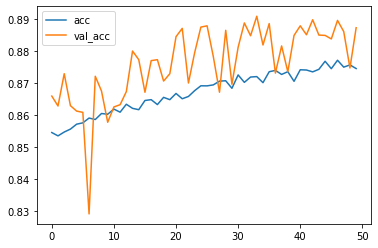

In [47]:
metrics=pd.DataFrame(model.history.history)
metrics[['acc','val_acc']].plot()

In [49]:
model.save(filepath="x89.h5")

In [17]:

import os
os.listdir()

['.ipynb_checkpoints',
 'Cifar-10.ipynb',
 'mnist.ipynb',
 'test',
 'Untitled.ipynb',
 'wandb',
 'x.h5',
 'x77.h5',
 'x78.h5',
 'x79.h5',
 'x79D128.h5',
 'x79D256.h5',
 'x86.h5',
 'x89.h5']

In [18]:
data_dir="C:\\Users\\PrasannaDevadiga\\Desktop\\paper\\practice\\test"


In [19]:
from matplotlib.image import imread

In [20]:
pwd

'C:\\Users\\PrasannaDevadiga\\Desktop\\paper\\practice'

In [21]:
x=300000
import natsort
a=natsort.natsorted(os.listdir(data_dir))
#print(a)
test_kaggle=[]
for i in a:
    x=os.path.join(data_dir,i)
    test_kaggle.append(imread(x))



In [22]:
test_kaggle=np.array(test_kaggle)

## 

In [23]:
test_kaggle.shape

(300000, 32, 32, 3)

In [24]:
new_output=model.predict(test_kaggle)

In [25]:
array=[]
for i in new_output:
    array.append(np.argmax(i)+1)


In [26]:
array=np.array(array)

In [27]:
new_df=pd.DataFrame(array)

In [28]:
new_df.index+=1
new_df

,0
1,5
2,3
3,2
4,9
5,1
...,...
299996,9
299997,3
299998,7
299999,7


In [29]:
map_dict = {1: "airplane",2:"automobile",3:"bird",4:"cat",5:"deer",6:"dog",7:"frog",8:"horse",9:"ship",10:"truck"}
new_df["label"] = new_df[0].map(map_dict)

In [34]:
xl=new_df.drop([0],axis=1)
xl.to_csv("C:\\Users\\PrasannaDevadiga\\Desktop\\paper\\practice\\xy.csv",encoding='utf-8')
xl.index.name='id'
xl.head()

,label
id,
1,deer
2,bird
3,automobile
4,ship
5,airplane


In [ ]:
df.to_csv('file_name.csv',)